## Practice questions on finite Markov Chain
**Winter Camp of Quantitative Economics and Finance, 2019, Peking University HSBC Business School**

Jiao Shi would like to thank Lingdi xu, Zihao Mao, and Gan Wu for their excellence assitance

## Question 1: PageRank

PageRank (PR) is an algorithm used by Google Search to rank web pages in their search engine results. PageRank was named after Larry Page, one of the founders of Google. PageRank is a way of measuring the importance of website pages. According to Google:

*PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.*

Currently, PageRank is not the only algorithm used by Google to order search results, but it is the first algorithm that was used by the company, and it is the best known.

The PageRank algorithm outputs a probability distribution used to represent the likelihood that a person randomly clicking on links will arrive at any particular page. PageRank can be calculated for collections of documents of any size. It is assumed in several research papers that the distribution is evenly divided among all documents in the collection at the beginning of the computational process. The PageRank computations require several passes, called "iterations", through the collection to adjust approximate PageRank values to more closely reflect the theoretical true value.

A probability is expressed as a numeric value between 0 and 1. A 0.5 probability is commonly expressed as a "50% chance" of something happening. Hence, a PageRank of 0.5 means there is a 50% chance that a person clicking on a random link will be directed to the document with the 0.5 PageRank.

Now consider a small universe of four webpages: Facebook(FB), Youtube(YT), Amazon(AM) and Google Maps(GM). Links from a page to itself are ignored. Multiple outbond links from one page to another page are treated as a single link. PageRank is initialized to the same value for all pages, which consists of a probability distribution with four states (FB, YT AM & GM).

1. Write down the initial PageRank.
2. Suppose that a person randomly clicks on the links available on each page.  YT has a link to AM and FB. AM has a link to FB. GM and FB have links to all three pages. Write down the transition matrix for this system.
3. Compute the page rank after one iteration.
4. Compute the page rank in the "steady state" (i.e. in the long run, what's the eventual page rank of the four webpages?)

**Answer**: The transition matrix is

$\begin{bmatrix}0& \frac{1}{3}&\frac{1}{3}&\frac{1}{3}\\
\frac{1}{2}& 0 &\frac{1}{2}& 0\\
1 & 0 & 0 & 0 \\
\frac{1}{3} & \frac{1}{3} & \frac{1}{3} & 0\end{bmatrix} $

In [1]:
import numpy as np
import quantecon as qe

iPR= np.array([1/4, 1/4, 1/4, 1/4])

tr=np.matrix([[0, 1/3, 1/3, 1/3], 
              [1/2, 0, 1/2, 0],
              [1, 0, 0, 0],
              [1/3, 1/3, 1/3, 0]], dtype=float)

iPR@tr

matrix([[0.45833333, 0.16666667, 0.29166667, 0.08333333]])

In [2]:
mc=qe.MarkovChain(tr)
mc.stationary_distributions

array([[0.40909091, 0.18181818, 0.27272727, 0.13636364]])

## Question 2: Option pricing

**Background**

In finance, derivative is a contract which value is 'derived' from value of underlying assets. 

Option is one type of derivatives.

A European call option gives holder (buyer) the right, but not obligation, to buy underlying assets at a prescribed price (strike price) at the speficed date (maturity). For example, the largest operating expense for an airline company is the oil expense. If current oil prices is 100 dollars per barrel, but the company worries that the oil price in one quarter may rise to over 105 per barrel. Then the company may purchase an oil option at say, 2 dollars, with a stirke price of 105 and matures in one quarter. If at maturity, the oil price is below 105, then the company does not exercise the option. However, if the option price is 108, then the company exercises the option, and is able to purchase oil at 105. The net gain for the company in the option trading is 108 - 105 - 2 = 1. In this way, the company can manage their risk exposure to adverse moverment in future oil price.

Value of an European call option at time $t = 0$ that matures at time T with a strike price K, is given by

$$ V_{0,T} = e^{-rT} \mathbb{E}_0 [max(S_T - K, 0)] $$

where $ S_T $ is underlying asset price at time T, and $ e^{-rT} $ is a continuous discount factor.

**Setup** 

Suppose now that the underlying asset price, $S_t$, evolves according to a Markov process. Depending on the economy status of being good, normal, or bad, the asset has price 15, 10, or 5. The transition probability, $P(x,y)$, is given by

$$
P(x, y) = 
\begin{bmatrix}
0.75 & 0.15 & 0.1 \\
0.1 & 0.8 & 0.1 \\
0.1 & 0.2 & 0.7 \\
\end{bmatrix}
$$

That is, if the economy is in the 'good' state currently (the first row), then the probability that the economy is good, normal, or bad next period is 0.75, 0.15, and 0.1, respectively. Similar interpretation for the second and third row.

**Question**

Assume that the option has a strike price of K = 9, and mature in T periods.

* Suppose that T = 1, condition on $ S_0 = 10 $, what is $ V_{0,1} $ ?

That is, the option matures in one period, and current price of underlying asset is 10, what is the option price today?

* For T = 1, 2, $\cdots$, 30, condition on $ S_0 = 10 $, plot $V_{0,T}$ against the series of T. How to interpret the results?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe

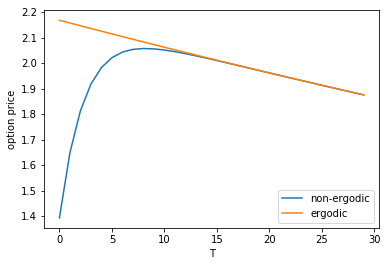

ergodic distribution is  [[0.28571429 0.46428571 0.25      ]]
ergodic distribution by iteration is  [0.28571429 0.46428571 0.25      ]
ergodic distribution by formula is  [0.28571429 0.46428571 0.25      ]


In [89]:
def OptionValue(state, P, strike, r, p_0, T, ergodic=False):
    'Calculate option value by sum of payoffs weighted by probability distribution of underlying asset price'
    if ergodic == False:
        dist_T = p_0 @ np.linalg.matrix_power(P, T)
    else:     # to plot the orange line for comparison purposes
        mc = qe.MarkovChain(P, state_values=state)
        dist_T = mc.stationary_distributions
    p_T = state - strike
    p_T[p_T < 0.0] = 0.0  # payoff at time T
    v_T = np.sum(dist_T * p_T) # weighted sum 
    v_0 = np.exp(-r * T) * v_T # discount to time 0
    return v_0

state = np.array([15.0, 10.0, 5.0])
P = np.array([[0.75, 0.15, 0.1],
             [0.1, 0.8, 0.1],
             [0.1, 0.2, 0.7]])
strike = 9
r = 5e-3
p_0 = np.array([0, 1, 0])
T = 30

v_path = np.zeros(T)
v_path_ergodic = np.zeros(T)

fig, ax = plt.subplots()
for ii in range(T):
    v_path[ii] = OptionValue(state, P, strike, r, p_0, ii+1, False)
    v_path_ergodic[ii] = OptionValue(state, P, strike, r, p_0, ii+1, True)    
ax.plot(range(len(v_path)), v_path, label='non-ergodic')
ax.plot(range(len(v_path)), v_path_ergodic, label='ergodic')
ax.legend(loc='lower right')
ax.set(xlabel='T', ylabel='option price' )
plt.show()

# Appendix
# Compute ergodic distribution using QuantEcon.MarkovChain
mc = qe.MarkovChain(P, state_values=state)
ergodic_dist = mc.stationary_distributions
print('ergodic distribution is ', ergodic_dist)

# Compute ergodic distribution by matrix power
ergodic_dist= p_0 @ np.linalg.matrix_power(P, 100)
print('ergodic distribution by iteration is ', ergodic_dist)

# Compute ergodic distribution by formula
def ErgodicDist(P):
    dim = np.shape(P)[0]
    A = P - np.identity(dim)
    A[:, -1] = np.ones(dim)
    b = np.zeros(dim)
    b[-1] = 1
    return np.linalg.solve(A.T, b)

ergodic_dist = ErgodicDist(P)
print('ergodic distribution by formula is ', ergodic_dist)

Interpretation: From the figure, given that current price of underlying asset is 10, option value first increase with maturity T, and then decreases in around 9 periods. The intuition is that at time 0, underlying asset price has a distribution of  [0, 1, 0], i.e., current asset price is 10, and in several periods, probability distribution of underlying asset price converges to the ergodic distribution, which is [0.29, 0.46, 0.25]. Since the ergodic distribution has a higher weight on larger payoff value of 15, option price increases with T. However, for longer maturity, the discount factor comes into play, and option value gradually decreases with T. 

As a comparison, the orange curve plots option value against maturity T, assuming that for each period, distribution of underlying asset price is the ergodic distribution. We can observe that the two curves converge in around 13 periods. That is, distribution of underlying asset price, by assuming a start point at $ s_0 = 10 $ and evolving according to a Markov process, converges to the ergodic distribution, in around 13 periods.

## Question 3 (optional, try for fun): Bad loans

In 2008, the subprime crisis swept the world. The investment banks in Wallstreet suffered the shock of collective default. The stock price of Citi Group drops from 55 dollar to only 1 dollar. Citi Group made losses in all 4 quarters in 2008 due to large loss in value of mortgage-backed securities. Rumors about its bankruptcy spread in Wallstreet. Now, assume that you are a Fund manager who is trying to gain insight into the bad loan problem of Citi Group.

The market is concerned that the bad loan and debt will crush Citi Group. Some investors speculate that Citi Group will take many years to dispose its huge bad loans, and thus will make no profit and zero dividend to stock-holders. 


In this canse, we want to learn the process of changes in loans. 

Following international standard, we could classify the loans into 5 categories:  

$N_{1}=$ Normal loans

$N_{2}=$ Special-mentioned　loans

$N_{3}=$ Subprime　loans

$N_{4}=$ Doubt　loans

$N_{5}=$ Loss

Next, we assume that the status of loans are governed by the Markov Matrix
$M$=
$$
 \left\{
 \begin{matrix}
   N_{11} & N_{12} & N_{13} & N_{14} & N_{15}\\
   N_{21} & N_{22} & N_{23} & N_{24} & N_{25} \\
   N_{31} & N_{32} & N_{33} & N_{34} & N_{35} \\
   N_{41} & N_{42} & N_{43} & N_{44} & N_{45} \\
   N_{51} & N_{52} & N_{53} & N_{54} & N_{55}
  \end{matrix}
  \right\} \tag{2}
$$

Where  $N_{xy}$ represents the probability of state $N_{x}$ transferring into $N_{y}$

We assume the Markov Matrix is given by:

$M$=
$$
 \left\{
 \begin{matrix}
   0.9 & 0.05 & 0.05 & 0 & 0\\
   0.1 & 0.8 & 0.05 & 0.05 & 0 \\
   0.1 & 0.15 & 0.7 & 0.05 & 0 \\
   0.05 & 0.05 & 0.05 & 0.7 & 0.15 \\
   0 & 0 & 0.05 & 0.1 & 0.85
  \end{matrix}
  \right\} \tag{2}
$$

During the subprime crisis, most Home mortgage normal loans fell into Subprime loans level or even worse level because the collapes of real estate(collateral) could not support the value of home mortgage loan. At that time, nearly 40% of loans in Citi group are subprime loan. If those bad loans can not pay their principal and interest, Citi group would go bankrupt with no doubt. 

In our case, we assume that at the depth of crisis, the intial loan strucutre of Citi group is 

$LS_{0}$=
$$
 \left\{
 \begin{matrix}
   0.15 \\
   0.15 \\
   0.4 \\
   0.15 \\
   0.15 \\
  \end{matrix}
  \right\} \tag{2}
$$
Which means at initial time 0, the normal loans, special-mentioned loans, subprime loans, doubt loans and loss account for 15%, 15%, 40%, 15%, 15% in Citi Group total Loan. The Citi Group loan structual consisted of 70% bad loans.

Another factor we need to consider is the monetary policy of Federal Reserve. If FED turns dovish, cutting interest rate and using QE to provide excessive money supply, every period, Citi group will have 3% new normal loans. If Fed stay hawkish, Citi group will only have 1% new normal loans. If Fed are neutral, Citi group will have 2% new normal loans growth. At the initial period, FED is dovish, and monetary policy tranferring matrix is as follow:

$MP$=
$$
 \left\{
 \begin{matrix}
   0.8 & 0.1 & 0.1\\
   0.6 & 0.4 & 0.1\\
   0.3 & 0.3 & 0.4 \\
  \end{matrix}
  \right\} \tag{2}
$$

Where $N_{11}$=0.8 means if Fed is dovish at present period, there is 80% of probabilty that it will still hold the dovish position at the next period. $N_{12}$=0.1 means if Fed is dovish at present period, there is 10% of probabilty that it will turn netural in the next period. $N_{13}$=0.1 means if Fed is dovish at present period, there is 10% of probabilty that it will turn hawkish in the next period. 

**Question**

Simulate the model, and find out how long it will take for Citi Group to recover? (i.e. Go back to its long-run level of bad loans.) 
What is the level of bad loan rate for Citi Group during the recovery and in the long run?

In [3]:
import numpy as np
import scipy.stats as stats # Distribution classes of random variable
import matplotlib.pyplot as plt

In [4]:
#initialize the first period value

LS=[0.15, 0.15, 0.4, 0.15, 0.15]
M=np.array([[0.9, 0.95, 1, 1],
    [0.1, 0.9, 0.95, 1],
    [0.1, 0.25, 0.95, 1],
    [0.05, 0.1, 0.15, 0.85],
    [0, 0, 0.05, 0.15]])
MP=np.array([[0.8,0.9],[0.5,0.9],[0.3,0.6]])
Fed=0 # Fed=0 Dovish, Fed=1 netural, Fed=2 hawks
period=100
stimulation_time=1000

In [5]:
K=np.empty([1000,100],dtype=float) 
for k in range (stimulation_time):
    Badrate=[]
    LS=[0.15, 0.15, 0.4, 0.15, 0.15]
    Fed=0
    for i in range(period):
        new_ls=np.array([0.,0.,0.,0.,0.])
        m_rd=np.random.rand(5)
        for j in range(5):
            if m_rd[j-1]<M[j-1,0]:
                new_ls[0]=new_ls[0]+LS[j-1]
            elif m_rd[j-1]>M[j-1,0] and m_rd[j-1]<M[j-1,1]:
                new_ls[1]=new_ls[1]+LS[j-1]
            elif m_rd[j-1]>M[j-1,1] and m_rd[j-1]<M[j-1,2]:
                new_ls[2]=new_ls[2]+LS[j-1]
            elif m_rd[j-1]>M[j-1,2] and m_rd[j-1]<M[j-1,3]:    
                new_ls[3]=new_ls[3]+LS[j-1]
            else:
                new_ls[4]=new_ls[4]+LS[j-1]
        mp_rd=np.random.rand(1)
        if Fed==0:
            if mp_rd<MP[0,0]:
                new_ls[0]=new_ls[0]+0.03
                LS=new_ls/1.03
                Badrate=np.append(Badrate,1-LS[0]-LS[1])
                Fed=0
            elif mp_rd>MP[0,0] and mp_rd<MP[0,1]:
                new_ls[0]=new_ls[0]+0.02
                LS=new_ls/1.02
                Badrate=np.append(Badrate,1-LS[0]-LS[1])
                Fed=1
            else:
                new_ls[0]=new_ls[0]+0.01
                LS=new_ls/1.01
                Badrate=np.append(Badrate,1-LS[0]-LS[1])
                Fed=2      
        elif Fed==1:
            if mp_rd<MP[1,0]:               
                new_ls[0]=new_ls[0]+0.03
                LS=new_ls/1.03
                Badrate=np.append(Badrate,1-LS[0]-LS[1])
                Fed=0
            elif mp_rd>MP[1,0] and mp_rd<MP[1,1]:
                new_ls[0]=new_ls[0]+0.02
                LS=new_ls/1.02
                Badrate=np.append(Badrate,1-LS[0]-LS[1])
                Fed=1
            else:
                new_ls[0]=new_ls[0]+0.01
                LS=new_ls/1.01
                Badrate=np.append(Badrate,1-LS[0]-LS[1])
                Fed=2   
        elif Fed==2:
            if mp_rd<MP[2,0]:               
                new_ls[0]=new_ls[0]+0.03
                LS=new_ls/1.03
                Badrate=np.append(Badrate,1-LS[0]-LS[1])
                Fed=0
            elif mp_rd>MP[2,0] and mp_rd<MP[2,1]:
                new_ls[0]=new_ls[0]+0.02
                LS=new_ls/1.02
                Badrate=np.append(Badrate,1-LS[0]-LS[1])
                Fed=1
            else:
                new_ls[0]=new_ls[0]+0.01
                LS=new_ls/1.01
                Badrate=np.append(Badrate,1-LS[0]-LS[1])
                Fed=2 
       
    K[k,:]=Badrate
    
K_mean=np.mean(K,0)

K_mean


array([0.58641115, 0.50670236, 0.45039264, 0.41443836, 0.39552161,
       0.36547603, 0.35520387, 0.34955207, 0.35341485, 0.34470928,
       0.34284386, 0.32287134, 0.31510114, 0.31595973, 0.3149508 ,
       0.31825641, 0.30395501, 0.29990703, 0.28828037, 0.28757416,
       0.29623741, 0.2872622 , 0.29063253, 0.28560351, 0.2830166 ,
       0.27472457, 0.26291795, 0.26437783, 0.26784273, 0.27243536,
       0.26622287, 0.25358827, 0.25195224, 0.2529206 , 0.25601203,
       0.26418084, 0.25773922, 0.27624132, 0.26332455, 0.26207139,
       0.26715071, 0.26392758, 0.26627378, 0.25947981, 0.26122632,
       0.26962131, 0.27780582, 0.28113886, 0.27529927, 0.26915721,
       0.27180062, 0.28525487, 0.27276758, 0.28173525, 0.28726307,
       0.28195175, 0.27304749, 0.27253547, 0.28305309, 0.27312982,
       0.27486238, 0.26880884, 0.27372428, 0.2802094 , 0.27024549,
       0.27359145, 0.2747076 , 0.26722273, 0.26559162, 0.26176201,
       0.27297915, 0.27714645, 0.27915886, 0.27227381, 0.28164

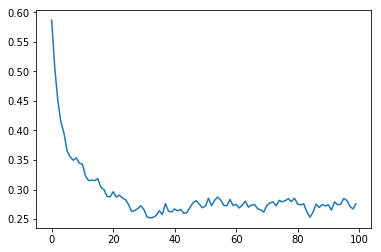

In [6]:
plt.plot(K_mean)

According to the Markov chain Model, we learn that the probable level of bad loans for Citi Group in the Future ranges from 24% to 29%, which is much lower than the level in 2008. Moverover, after about 30 periods, Citi group will recover to the level before the financial crisis. 